In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')
data.head(5)

,Unnamed: 0,CREATION_TIME,EDITION_TIME,NAME,STATUS,TAG,DATE
0,0,2024-07-13T00:59:00.000Z,2024-07-13T00:59:00.000Z,Мб въебать тему кейсов в кейсклубе МФТИ,Goals,[],NaN
1,1,2024-07-13T00:18:00.000Z,2024-07-13T00:18:00.000Z,Написать свой GPT2,Top Priority,[],NaN
2,2,2024-07-13T00:17:00.000Z,2024-07-13T00:18:00.000Z,Расшарить LoRa,Top Priority,[],NaN
3,3,2024-07-13T00:16:00.000Z,2024-07-13T00:16:00.000Z,Рассмотреть семинар по суммаризации в NLP,Top Priority,[],NaN
4,4,2024-07-12T13:27:00.000Z,2024-07-12T13:27:00.000Z,Посмотреть Нейчева про BERT,Top Priority,[],NaN


In [3]:
data.STATUS.value_counts()

STATUS
Succesfully accomplished                          1167
Unaccomplished                                     142
Goals                                               94
It was a bad Idea                                   31
Personal Development                                27
To do with Sussy                                    26
Achieved Projects                                   20
Top Priority                                        19
Second Priority (If there will be time for it)      19
Someday                                             11
Life beyond visible side                             4
Contacts Network connections                         3
Projects Unachieved                                  3
Repetetive Tasks                                     2
Name: count, dtype: int64

# 1. Basic ideas with accomplished tasks names:

In [4]:
sc_data = data[data['STATUS'] == 'Succesfully accomplished']
ac_data = data[data['STATUS'] == 'Unaccomplished']
ap_data = data[data['STATUS'] == 'Achieved Projects']

### Let's count number of word in average accomplished task

In [5]:
sc_data.NAME

5              Посмотреть две лекции и семинар DLS по NLP
16                    Прочитать attention is all you need
20      Расшарить как работать с lstm (наконец то норм...
21       Посмотреть рабочий семинар про MlFLow и Lightnin
23              Разобраться что за a, b, y Fourier Bands 
                              ...                        
1590                                    Зашарить в Химии 
1594                                  Сделать праки Максу
1596                                         Оформить GTD
1601                 Сделать домашку к репету по Русскому
1602                                Сделать Жаутык - 2012
Name: NAME, Length: 1167, dtype: object

In [6]:
sc_data.NAME.str.split().str.len().mean()

4.174698795180723

It's an average length in terms of words

### Let's count number of characters (aside from space) in average accomplished task

In [7]:
sc_data.NAME.str.replace(' ', '').str.len().mean()

25.879518072289155

It's an average length in terms of characters

### Let's estimate an average length of the used words

In [8]:
def avg_word_length(sentence):
    words = sentence.split()
    return (sum(len(str(word)) for word in words)/len(words))

In [48]:
sc_data.NAME.apply(lambda x: avg_word_length(str(x))).mean()

6.678220772372443

In [9]:
sc_data['avg_word_length'] = sc_data.NAME.apply(lambda x: avg_word_length(str(x)))

/tmp/ipykernel_8773/1669029692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data['avg_word_length'] = sc_data.NAME.apply(lambda x: avg_word_length(str(x)))


In [10]:
sc_data[['NAME', 'avg_word_length']]

,NAME,avg_word_length
5,Посмотреть две лекции и семинар DLS по NLP,4.375000
16,Прочитать attention is all you need,5.000000
20,Расшарить как работать с lstm (наконец то норм...,5.777778
21,Посмотреть рабочий семинар про MlFLow и Lightnin,6.000000
23,"Разобраться что за a, b, y Fourier Bands",4.125000
...,...,...
1590,Зашарить в Химии,4.666667
1594,Сделать праки Максу,5.666667
1596,Оформить GTD,5.500000
1601,Сделать домашку к репету по Русскому,5.166667


In [11]:
sc_data.avg_word_length.mean()

6.678220772372443

# 2. Advanced names 

### For accomplished tasks

In [57]:
text = sc_data.NAME.astype(str)

def clear_punctuation(string : str):
    for punct in ['.', ':', ',', '!', '?', ';', '\\', '/', '-', ')', '(']:
        string = string.replace(punct, ' ')
    return string

text = text.apply(lambda x: clear_punctuation(x))
text = text.str.lower()
text = ' '.join(text.to_list()).split() #dictionary of words


In [58]:
def filter(text : str):
    filtered = [word for word in text if len(word) > 3]
    return filtered

text = filter(text)

In [59]:
pd.Series(text).value_counts()

сделать        151
написать        97
решить          81
неделю          72
посмотреть      62
              ... 
сдам             1
монитор          1
параметрику      1
промерить        1
2012             1
Name: count, Length: 1688, dtype: int64

### For unaccomplished tasks

In [15]:
ac_text = ac_data.NAME.astype(str)
ac_text = ac_text.apply(lambda x: clear_punctuation(x))
ac_text = ac_text.str.lower()
ac_text = ' '.join(ac_text.to_list()).split()
ac_text = filter(ac_text)

In [16]:
pd.Series(ac_text).value_counts()

податься      14
сделать       14
посмотреть     7
лекцию         7
сходить        5
              ..
сервис         1
пиксель        1
починить       1
диффурам       1
admissions     1
Name: count, Length: 392, dtype: int64

In [17]:
ap_text = ap_data.NAME.astype(str)
ap_text = ap_text.apply(lambda x: clear_punctuation(x))
ap_text = ap_text.str.lower()
ap_text = ' '.join(ap_text.to_list()).split()
ap_text = filter(ap_text)

In [18]:
import os

from os import path
from wordcloud import WordCloud
from PIL import Image
import random

In [19]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


In [20]:
mask = np.array(Image.open('coffee.jpg'))
wordcloud = WordCloud(mask=mask).generate(' '.join(text))

/home/matthew/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


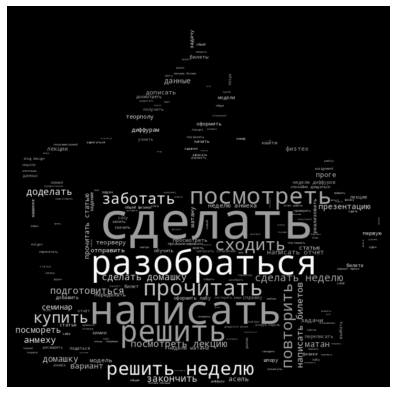

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.savefig('completed.png')

In [22]:
mask = np.array(Image.open('hand.jpg'))
wordcloud = WordCloud(mask=mask).generate(' '.join(text))

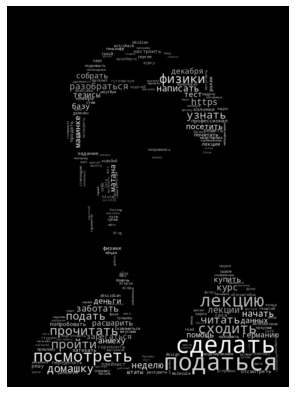

In [23]:
mask = np.array(Image.open('hand.jpg'))
wordcloud = WordCloud(mask=mask,
               random_state=1).generate(' '.join(ac_text))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.savefig('uncompleted.png')

https://github.com/amueller/word_cloud?tab=readme-ov-file

### Let's add an stop words clear feature 

In [24]:
from nltk.corpus import stopwords
import nltk

# Create a set of stop words 
stop_words = set(stopwords.words('russian')) 

def remove_stop_words(sentence : list, filter_array=stop_words): 
  filtered_words = [word for word in sentence if word not in filter_array] 
  
  return filtered_words

pd.Series(remove_stop_words(text)).value_counts()

сделать        151
написать        97
решить          81
неделю          72
посмотреть      62
              ... 
сдам             1
монитор          1
параметрику      1
промерить        1
2012             1
Name: count, Length: 1668, dtype: int64

In [25]:
exclude_words = ['сделать', 'написать', 'решить', 'посмотреть', 'разобраться', 'прочитать', 'сходить', 'повторить', 'подготовиться', 'оформить', 'купить']

pd.Series(remove_stop_words(text, exclude_words)).value_counts()

неделю      72
домашку     32
лекцию      28
статью      25
заботать    20
            ..
подобие      1
комнаты      1
одежду       1
грязную      1
2012         1
Name: count, Length: 1677, dtype: int64

### This can be performed further, as we can mark all verbs and not count them 

In [26]:
sample_text = '''ночь красива и мила, очень спать хочет она''' 
from nltk.tokenize import word_tokenize
words = word_tokenize(sample_text)

print(nltk.pos_tag(words))

[('ночь', 'JJ'), ('красива', 'NNP'), ('и', 'NNP'), ('мила', 'NNP'), (',', ','), ('очень', 'NNP'), ('спать', 'NNP'), ('хочет', 'NNP'), ('она', 'NN')]


In [27]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [28]:
def filter_verbs(text: list):
    filtered = [word for word in text if morph.parse(word)[0].tag.POS != 'INFN' and morph.parse(word)[0].tag.POS != 'VERB']
    return filtered

pd.Series(filter_verbs(text)).value_counts()
#'INFN' or 'VERB'

неделю         72
домашку        32
лекцию         28
статью         25
заботать       20
               ..
финальную       1
диффурампро     1
параграф        1
хуже            1
2012            1
Name: count, Length: 1429, dtype: int64

In [29]:
pd.Series(filter_verbs(ac_text)).value_counts()

лекцию        7
физики        4
https         3
лекции        3
домашку       3
             ..
isti          1
углом         1
кареткой      1
fisting       1
admissions    1
Name: count, Length: 322, dtype: int64

### It's can be seen, that simiar words are countend separately, thus I will put all words into normal form 

In [30]:
def normalize_words(text: list):
    filtered = [morph.parse(word)[0].normal_form for word in text if morph.parse(word)[0].tag.POS != 'INFN' and morph.parse(word)[0].tag.POS != 'VERB']
    return filtered

In [31]:
pd.Series(normalize_words(filter_verbs(text))).value_counts()

неделя               81
билет                46
лекция               44
статья               42
домашка              37
                     ..
мышка                 1
фоллович              1
kotor                 1
работоспособность     1
2012                  1
Name: count, Length: 1188, dtype: int64

In [32]:
pd.Series(normalize_words(filter_verbs(ac_text))).value_counts()

лекция        12
физика         8
задача         4
горизонт       4
курс           4
              ..
бумажка        1
zurich         1
стажировка     1
munich         1
admissions     1
Name: count, Length: 295, dtype: int64

# 3. Dates and times analysis

### Chart of activities against month

In [33]:
from datetime import datetime, date

def format_datatime(string : str):
    return string[:-5].replace('T', '-')
    

data.CREATION_TIME = data.CREATION_TIME.apply(lambda x: format_datatime(x))
data.EDITION_TIME = data.EDITION_TIME.apply(lambda x: format_datatime(x))

In [34]:
print(datetime.strptime(str(data.iloc[0].EDITION_TIME), '%Y-%m-%d-%H:%M:%S').month)

7


In [35]:
creation_months = np.zeros(12)
completion_months = np.zeros(12)

creation_times = []
completion_times = []


for date in data[data['STATUS'] == 'Succesfully accomplished'].CREATION_TIME:
    creation_months[datetime.strptime(date, '%Y-%m-%d-%H:%M:%S').month - 1] += 1
    creation_times.append(datetime.strptime(date, '%Y-%m-%d-%H:%M:%S'))

for date in data[data['STATUS'] == 'Succesfully accomplished'].EDITION_TIME:
    completion_months[datetime.strptime(date, '%Y-%m-%d-%H:%M:%S').month - 1] += 1
    completion_times.append(datetime.strptime(date, '%Y-%m-%d-%H:%M:%S'))

In [36]:
task_time = np.array([i.total_seconds() for i in  (np.array(completion_times) - np.array(creation_times))])

In [37]:
task_time.mean()

1120680.9254498715

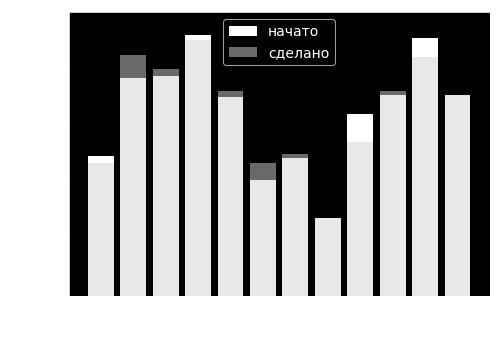

In [38]:
plt.figure(figsize=(7, 5))
plt.style.use('dark_background')
plt.bar(x=np.arange(1, 13), height=creation_months, color='white', label='начато')
plt.bar(x=np.arange(1, 13), height=completion_months, color='lightgray', label='сделано', alpha=0.5)
plt.xlabel('Месяц',fontsize=24)
plt.xticks(np.arange(1, 13)[::2], fontsize=14)
plt.ylabel('Кол-во задач',fontsize=24)
plt.yticks(np.arange(0, 151, 30), fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('months_tasks.jpg')

In [39]:
ac_creation_times = []
fail_times = []


for date in data[data['STATUS'] == 'Unaccomplished'].CREATION_TIME:
    ac_creation_times.append(datetime.strptime(date, '%Y-%m-%d-%H:%M:%S'))

for date in data[data['STATUS'] == 'Unaccomplished'].EDITION_TIME:
    fail_times.append(datetime.strptime(date, '%Y-%m-%d-%H:%M:%S'))

In [40]:
task_time = np.array([i.total_seconds() for i in  (np.array(fail_times) - np.array(ac_creation_times))])
task_time.mean()

4967627.3239436615

### Chart of activities in respect to week number

In [41]:
format_datatime(sc_data.EDITION_TIME.iloc[0])

'2024-07-13-00:16:00'

In [42]:
(datetime.strptime(format_datatime(sc_data.EDITION_TIME.iloc[0]), '%Y-%m-%d-%H:%M:%S')).isocalendar()

datetime.IsoCalendarDate(year=2024, week=28, weekday=6)

In [43]:
sc_data['year'] = sc_data.EDITION_TIME.apply(lambda x: datetime.strptime(format_datatime(x), '%Y-%m-%d-%H:%M:%S').isocalendar().year)
sc_data['week'] = sc_data.EDITION_TIME.apply(lambda x: datetime.strptime(format_datatime(x), '%Y-%m-%d-%H:%M:%S').isocalendar().week)
sc_data['weekday'] = sc_data.EDITION_TIME.apply(lambda x: datetime.strptime(format_datatime(x), '%Y-%m-%d-%H:%M:%S').isocalendar().weekday)

/tmp/ipykernel_8773/2303029198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data['year'] = sc_data.EDITION_TIME.apply(lambda x: datetime.strptime(format_datatime(x), '%Y-%m-%d-%H:%M:%S').isocalendar().year)
/tmp/ipykernel_8773/2303029198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data['week'] = sc_data.EDITION_TIME.apply(lambda x: datetime.strptime(format_datatime(x), '%Y-%m-%d-%H:%M:%S').isocalendar().week)
/tmp/ipykernel_8773/2303029198.py:3: SettingWithCopyWarning: 
A value is tryin

In [44]:
sc_data

,Unnamed: 0,CREATION_TIME,EDITION_TIME,NAME,STATUS,TAG,DATE,avg_word_length,year,week,weekday
5,5,2024-07-12T13:26:00.000Z,2024-07-13T00:16:00.000Z,Посмотреть две лекции и семинар DLS по NLP,Succesfully accomplished,[],NaN,4.375000,2024,28,6
16,16,2024-07-10T20:27:00.000Z,2024-07-12T00:13:00.000Z,Прочитать attention is all you need,Succesfully accomplished,[],NaN,5.000000,2024,28,5
20,20,2024-07-09T16:11:00.000Z,2024-07-11T16:30:00.000Z,Расшарить как работать с lstm (наконец то норм...,Succesfully accomplished,[],NaN,5.777778,2024,28,4
21,21,2024-07-08T23:59:00.000Z,2024-07-09T16:33:00.000Z,Посмотреть рабочий семинар про MlFLow и Lightnin,Succesfully accomplished,[],NaN,6.000000,2024,28,2
23,23,2024-07-08T17:03:00.000Z,2024-07-08T21:34:00.000Z,"Разобраться что за a, b, y Fourier Bands",Succesfully accomplished,[],NaN,4.125000,2024,28,1
...,...,...,...,...,...,...,...,...,...,...,...
1590,1590,2021-10-28T13:58:00.000Z,2023-01-18T10:03:00.000Z,Зашарить в Химии,Succesfully accomplished,[{'id': '32ba73e2-2301-4c4c-8dcd-c89d24298c55'...,NaN,4.666667,2023,3,3
1594,1594,2021-10-28T13:55:00.000Z,2021-11-10T19:18:00.000Z,Сделать праки Максу,Succesfully accomplished,[{'id': '32ba73e2-2301-4c4c-8dcd-c89d24298c55'...,NaN,5.666667,2021,45,3
1596,1596,2021-10-28T13:51:00.000Z,2021-12-09T18:04:00.000Z,Оформить GTD,Succesfully accomplished,[],NaN,5.500000,2021,49,4
1601,1601,2021-10-28T11:44:00.000Z,2022-03-31T10:17:00.000Z,Сделать домашку к репету по Русскому,Succesfully accomplished,[{'id': '32ba73e2-2301-4c4c-8dcd-c89d24298c55'...,NaN,5.166667,2022,13,4


/tmp/ipykernel_8773/2280881171.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  activity[day][week] += len(data_for_map[data_for_map['week'] == week][data_for_map['weekday'] == day + 1])
/tmp/ipykernel_8773/2280881171.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  activity[day][week] += len(data_for_map[data_for_map['week'] == week][data_for_map['weekday'] == day + 1])
/tmp/ipykernel_8773/2280881171.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  activity[day][week] += len(data_for_map[data_for_map['week'] == week][data_for_map['weekday'] == day + 1])
/tmp/ipykernel_8773/2280881171.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  activity[day][week] += len(data_for_map[data_for_map['week'] == week][data_for_map['weekday'] == day + 1])
/tmp/ipykernel_8773/2280881171.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

Text(0.5, 0, 'Номер недели')

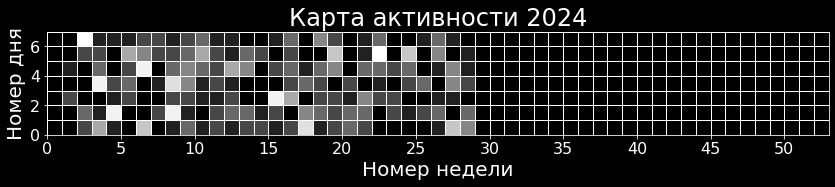

In [46]:
data_for_map = sc_data[sc_data['year'] == 2024]

activity = np.zeros((7, 53))

for day in np.arange(7):
    for week in np.arange(53):
        activity[day][week] += len(data_for_map[data_for_map['week'] == week][data_for_map['weekday'] == day + 1])


fig, ax = plt.subplots(figsize=(14, 11))
ax.set_aspect("equal")

plt.style.use('dark_background')
orig_map     = plt.cm.get_cmap('Grays') 
reversed_map = orig_map.reversed() 

plt.title('Карта активности 2024', fontsize=24)
plt.pcolormesh(activity, cmap=reversed_map, edgecolor="w")
#plt.xlim(0, df2.shape[1])
plt.xticks(np.arange(0, 53 ,5), fontsize=16)
plt.yticks(np.arange(0, 7, 2), fontsize=16)
plt.ylabel('Номер дня', fontsize=20)
plt.xlabel('Номер недели', fontsize=20)

### Chart of activities in respect to year

In [143]:
sc_data['year'].value_counts().to_dict()

{2023: 446, 2024: 369, 2022: 334, 2021: 11}

In [157]:
369 / len(sc_data[sc_data['year'] == 2022][sc_data['week'] <= 28])

/tmp/ipykernel_12629/1917424373.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  369 / len(sc_data[sc_data['year'] == 2022][sc_data['week'] <= 28])


2.1705882352941175

/tmp/ipykernel_12629/1295607661.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa_data['year'] = pa_data.EDITION_TIME.apply(lambda x: datetime.strptime(x, '%Y-%m-%d-%H:%M:%S').isocalendar().year)


Text(0.5, 0, 'Количество проектов')

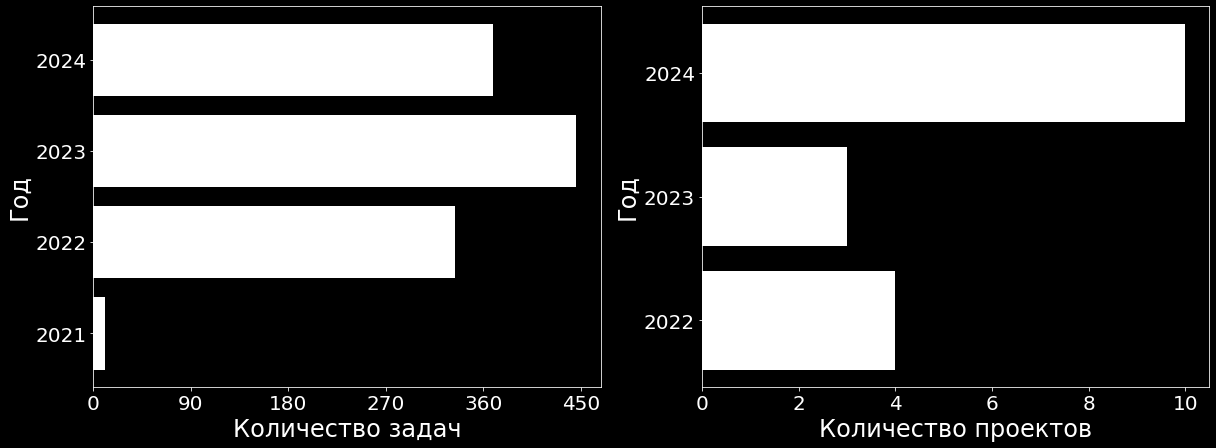

In [218]:
data_years = sc_data['year'].value_counts().to_dict()

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

plt.rcParams.update({'font.size': 20})

ax[0].barh(width=list(data_years.values()), y=list(data_years.keys()), color='white')
ax[0].set_yticks([key for key in sorted(data_years.keys())])#, fontsize=20)
ax[0].set_xticks(range(0, 451, 90))#, fontsize=20)
ax[0].set_ylabel('Год', fontsize=24)
ax[0].set_xlabel('Количество задач', fontsize=24)


pa_data   = data[data['STATUS'] == 'Achieved Projects']
pa_data['year'] = pa_data.EDITION_TIME.apply(lambda x: datetime.strptime(x, '%Y-%m-%d-%H:%M:%S').isocalendar().year)
data_years = pa_data['year'].value_counts().to_dict()


ax[1].barh(width=list(data_years.values()), y=list(data_years.keys()), color='white', )
ax[1].set_yticks([key for key in sorted(data_years.keys())])#, fontsize=20)
ax[1].set_xticks(range(0, 11, 2))#, fontsize=20)
ax[1].set_ylabel('Год', fontsize=24)
ax[1].set_xlabel('Количество проектов', fontsize=24)

# Bonus: a brain of cleared words of 2024

In [60]:
text = sc_data[sc_data['year'] == 2024].NAME.astype(str)
text = text.apply(lambda x: clear_punctuation(x))
text = text.str.lower()
text = ' '.join(text.to_list()).split()
text = filter(text)

In [61]:
mask = np.array(Image.open('brain.jpg'))
wordcloud = WordCloud(mask=mask).generate(' '.join(normalize_words(filter_verbs(text))))

In [62]:
pd.Series(normalize_words(filter_verbs(text))).value_counts()

неделя               81
билет                46
лекция               44
статья               42
домашка              37
                     ..
мышка                 1
фоллович              1
kotor                 1
работоспособность     1
2012                  1
Name: count, Length: 1188, dtype: int64

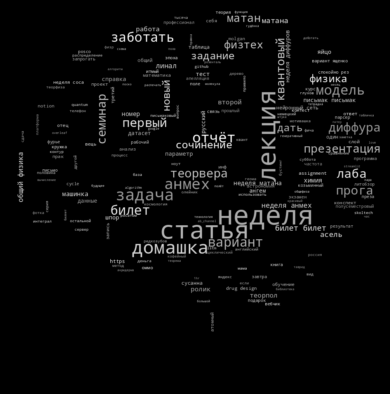

In [63]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.savefig('completed_filter.png')